In [33]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd 

In [4]:
# load data
df = pd.read_csv("train.csv")

In [5]:
df.shape

(20000, 3)

In [6]:
df.sample(10)

,Id,height,weight
15945,15946,67.03849,124.7975
13690,13691,65.12147,132.9884
9397,9398,69.37684,131.7743
11587,11588,64.51430,127.8143
19971,19972,67.17593,141.6974
6607,6608,68.48007,129.8380
18815,18816,66.75944,112.3085
3728,3729,69.85972,137.5864
19243,19244,65.12247,118.1968
9929,9930,67.08814,133.7359


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      20000 non-null  int64  
 1   height  20000 non-null  float64
 2   weight  20000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 468.9 KB


In [8]:
df.describe()

,Id,height,weight
count,20000.000000,20000.000000,20000.000000
mean,10000.500000,67.995227,127.097314
std,5773.647028,1.898964,11.657876
min,1.000000,60.612650,78.014760
25%,5000.750000,66.708220,119.333950
50%,10000.500000,67.998055,127.159050
75%,15000.250000,69.264955,134.873125
max,20000.000000,75.152800,170.547900


In [81]:
# # using pandas profiling 
# import pandas as pd
# from ydata_profiling import ProfileReport

# df = pd.read_csv("train.csv")

# profile = ProfileReport(df, title="Profiling Report", explorative=True)
# profile.to_file("report.html")

In [37]:
 df = df.drop('Id',axis =1)

In [38]:
# splittinng two types of indepent data 
x = df.weight 

In [25]:
y= df.height

In [27]:
x

0        129.3840
1        104.5786
2        131.7669
3        135.0276
4        118.4065
           ...   
19995    126.4284
19996    133.7741
19997    127.7977
19998    124.5901
19999    108.4186
Name: weight, Length: 20000, dtype: float64

In [28]:
y

0        70.49366
1        65.23482
2        67.59619
3        68.51919
4        67.07600
           ...   
19995    66.69938
19996    70.60422
19997    67.57167
19998    69.83352
19999    65.69830
Name: height, Length: 20000, dtype: float64

In [39]:
# scatterplt between both of them 
import matplotlib.pyplot as plt

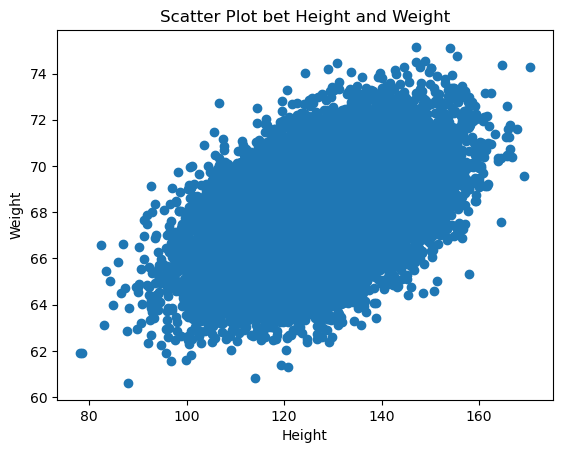

In [40]:
# scatter plot 
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter Plot bet Height and Weight")
plt.scatter(x, y)
plt.show()  

In [41]:
df.corr()

,height,weight
height,1.000000,0.502578
weight,0.502578,1.000000


Results : correlation shows that the Height and Weight and  postive corelation ( which may are related)

# Claculation of SSxx which represents the variablity of the data 

In [42]:
x_mean = x.mean()

In [49]:
y_mean = y.mean()

In [43]:
x_mean

127.09731392900001

In [57]:
y_mean

67.99522718899999

In [46]:
df['x_diff'] = x_mean -x

In [48]:
df.head()

,height,weight,x_diff
0,70.49366,129.3840,-2.286686
1,65.23482,104.5786,22.518714
2,67.59619,131.7669,-4.669586
3,68.51919,135.0276,-7.930286
4,67.07600,118.4065,8.690814


In [52]:
df['x_diff_sqq'] = df['x_diff'] ** 2

In [53]:
df.head()

,height,weight,x_diff,x_diff_sqq
0,70.49366,129.3840,-2.286686,5.228933
1,65.23482,104.5786,22.518714,507.092477
2,67.59619,131.7669,-4.669586,21.805034
3,68.51919,135.0276,-7.930286,62.889437
4,67.07600,118.4065,8.690814,75.530247


In [56]:
SSxx= df.x_diff_sqq.sum()

# Calculation of SSxy

In [58]:
y_mean = y. mean()

In [59]:
y_mean

67.99522718899999

In [66]:
df['y_diff'] = y_mean - y

In [67]:
df.head()

,height,weight,x_diff,x_diff_sqq,diff_y,y_diff
0,70.49366,129.3840,-2.286686,5.228933,-2.498433,-2.498433
1,65.23482,104.5786,22.518714,507.092477,2.760407,2.760407
2,67.59619,131.7669,-4.669586,21.805034,0.399037,0.399037
3,68.51919,135.0276,-7.930286,62.889437,-0.523963,-0.523963
4,67.07600,118.4065,8.690814,75.530247,0.919227,0.919227


In [64]:
SSxy = (df.x_diff * df.y_diff).sum()

In [65]:
df.head()

,height,weight,x_diff,x_diff_sqq,diff_y,y_diff
0,70.49366,129.3840,-2.286686,5.228933,-2.498433,-2.498433
1,65.23482,104.5786,22.518714,507.092477,2.760407,2.760407
2,67.59619,131.7669,-4.669586,21.805034,0.399037,0.399037
3,68.51919,135.0276,-7.930286,62.889437,-0.523963,-0.523963
4,67.07600,118.4065,8.690814,75.530247,0.919227,0.919227


# for slope 

In [68]:
m= SSxy/ SSxx

In [69]:
m

0.08186549625414623

#### Positive slope Less than 1 

In [71]:
# Calculation of intercept 
b = y_mean - m*x_mean

In [72]:
b

57.590342511633395

# Prdict The Value With Model 

In [73]:
def predict(value):
    predict = m*value + b
    return predict

In [75]:
predict( 140) # 140 is weight of the person having height is 69.05 unit 

69.05151198721387

In [77]:
predict(150)

69.87016694975533

# curve fitting 


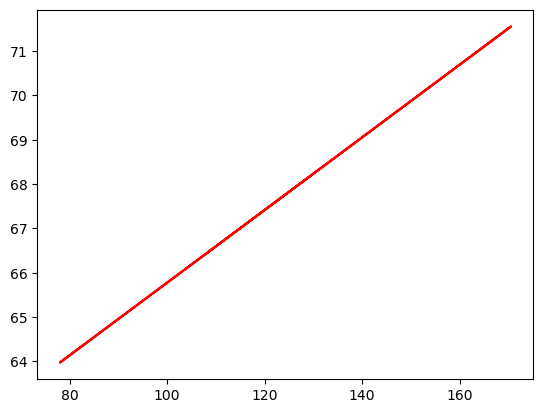

In [79]:
plt.plot(x,m*x+b ,'r')
plt.show()

# looking with Data 

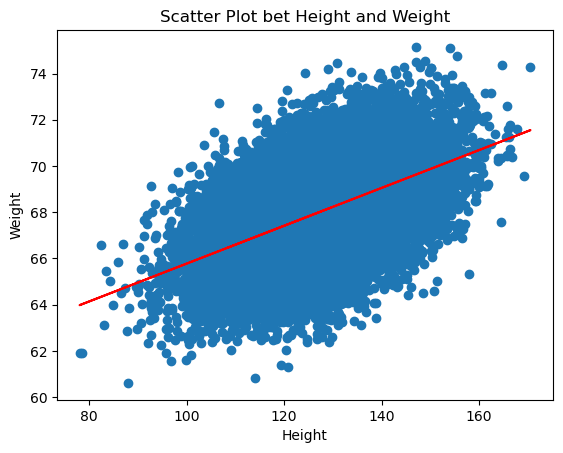

In [80]:
# scatter plot 
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter Plot bet Height and Weight")
plt.scatter(x, y)
plt.plot(x,m*x+b ,'r')
plt.show()

# RESULTS: This shows that the how the single line cover maximum line of fitting 

 # Thank you!!!